# Data Cleaning

In [70]:
import numpy as np
import pandas as pd

In [71]:
file = "C:/Users/María Moya/Documents/GitHub/PROJECT_EDA_JOAQUINVILLAR_ONLINE_DS_THEBRIDGE/src/data/Hello_Auto_data.xlsx"

In [72]:
df_vehicles = pd.read_excel(file,sheet_name = "Vehicles")
df_vehicles
df_vehicles.sample(12)

,policyId,vehicleId,fuel,vehicleAge,vehicletype
25880,12914,45923,Diésel,15,Turismo
36586,18628,59437,Diésel,12,Turismo
7916,3682,20330,Diésel,14,Turismo
9887,4575,23626,Diésel,6,Turismo
69537,39251,99245,Diésel,17,Turismo
66141,36821,91191,Diésel,17,Turismo
45676,23489,69662,Diésel,17,Todoterreno
25908,12930,45958,Gasolina,14,NaN
25018,12427,44644,Diésel,3,Furgoneta
33546,17027,55870,Diésel,14,Turismo


In [73]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78493 entries, 0 to 78492
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   policyId     78493 non-null  int64 
 1   vehicleId    78493 non-null  int64 
 2   fuel         78493 non-null  object
 3   vehicleAge   78493 non-null  int64 
 4   vehicletype  74709 non-null  object
dtypes: int64(3), object(2)
memory usage: 3.0+ MB


| Column          | Description  |
|-----------------|-----------------|
| policyId        | Número de identificación de póliza contratada| 
| customerId   | Número de identificación del vehículo asociado a la póliza| 
| fuel | Tipo de combustible del vehículo| 
| vehicleAge | Años del vehículo|
| vehicletype| Tipo de vehículo|

In [74]:
#Duplicados
df_vehicles.duplicated(keep=False).sum()

np.int64(0)

In [75]:
df_vehicles_cleaned = df_vehicles.drop_duplicates(keep = 'first')

In [76]:
df_vehicles_cleaned.duplicated(keep=False).sum()

np.int64(0)

In [77]:
df_vehicles_cleaned.isna().sum()

policyId          0
vehicleId         0
fuel              0
vehicleAge        0
vehicletype    3784
dtype: int64

In [78]:
df_vehicles_cleaned.dropna(subset=['vehicleAge'], how='all', inplace = True)

In [79]:
df_vehicles_cleaned.isna().sum()

policyId          0
vehicleId         0
fuel              0
vehicleAge        0
vehicletype    3784
dtype: int64

In [80]:
df_vehicles.fuel.value_counts()

fuel
Diésel       50362
Gasolina     26872
Híbrido       1007
Eléctrico      252
Name: count, dtype: int64

In [81]:
df_vehicles.vehicletype.value_counts()

vehicletype
Turismo        70738
Furgoneta       2559
Todoterreno     1406
Cuadriciclo        6
Name: count, dtype: int64

# Análisis Univariante

In [82]:
# Selección
df_tipificacion = pd.DataFrame([df_vehicles_cleaned.nunique(), df_vehicles_cleaned.nunique()/len(df_vehicles_cleaned) * 100, df_vehicles_cleaned.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion

,Card,%_Card,Tipo
policyId,44507,56.701872,int64
vehicleId,42418,54.040488,int64
fuel,4,0.005096,object
vehicleAge,36,0.045864,int64
vehicletype,4,0.005096,object


In [83]:
df_tipificacion["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion

,Card,%_Card,Tipo,Clasificada_como
policyId,44507,56.701872,int64,Numerica Continua
vehicleId,42418,54.040488,int64,Numerica Continua
fuel,4,0.005096,object,Categorica
vehicleAge,36,0.045864,int64,Numerica Discreta
vehicletype,4,0.005096,object,Categorica


In [84]:
df_vehicles_cleaned.describe().loc["mean"]

policyId      20994.363982
vehicleId     64272.948110
vehicleAge       13.334718
Name: mean, dtype: float64

In [85]:
df_vehicles_cleaned.describe().loc["50%"]

policyId      20090.0
vehicleId     60383.0
vehicleAge       15.0
Name: 50%, dtype: float64

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [88]:
categoricas_v = ["fuel", "vehicletype"]

In [89]:
for i in categoricas_v:
    print(f"Para{i}")
    print(df_vehicles_cleaned[i].value_counts())
    print("\n"*2)

Parafuel
fuel
Diésel       50362
Gasolina     26872
Híbrido       1007
Eléctrico      252
Name: count, dtype: int64



Paravehicletype
vehicletype
Turismo        70738
Furgoneta       2559
Todoterreno     1406
Cuadriciclo        6
Name: count, dtype: int64





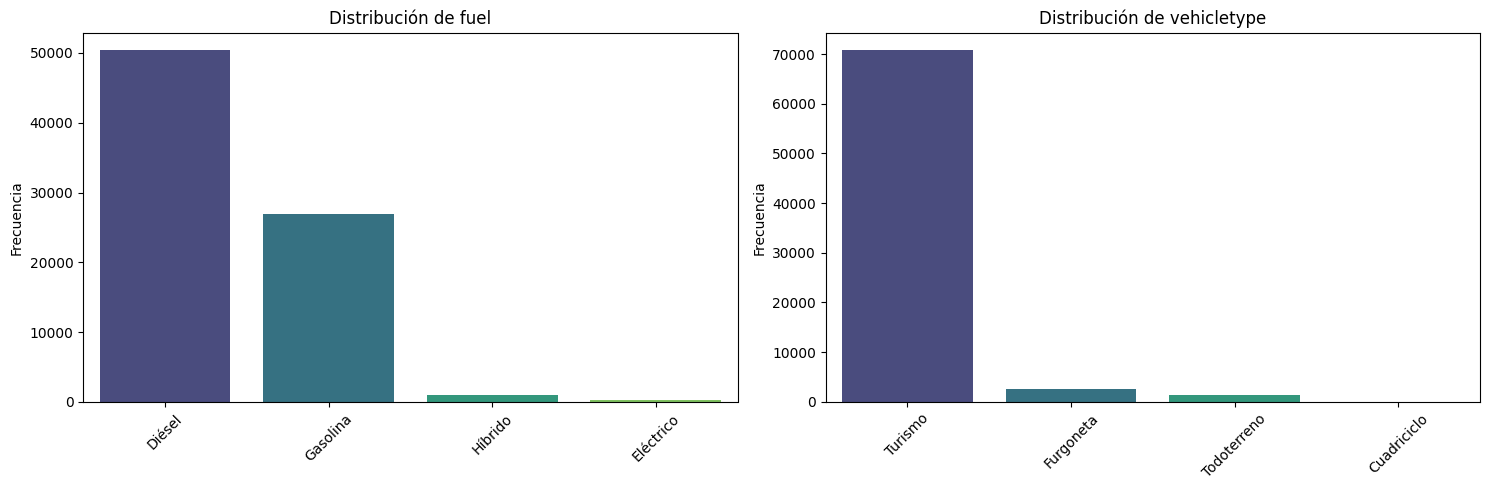

In [90]:
pinta_distribucion_categoricas(df_vehicles_cleaned, categoricas_v)

In [91]:
# Frecuencia Relativa
for i in categoricas_v:
    print(f"Para{i}")
    print(df_vehicles_cleaned[i].value_counts()/len(df_vehicles_cleaned)*100)
    print("\n"*2)

Parafuel
fuel
Diésel       64.161135
Gasolina     34.234900
Híbrido       1.282917
Eléctrico     0.321048
Name: count, dtype: float64



Paravehicletype
vehicletype
Turismo        90.120138
Furgoneta       3.260163
Todoterreno     1.791243
Cuadriciclo     0.007644
Name: count, dtype: float64





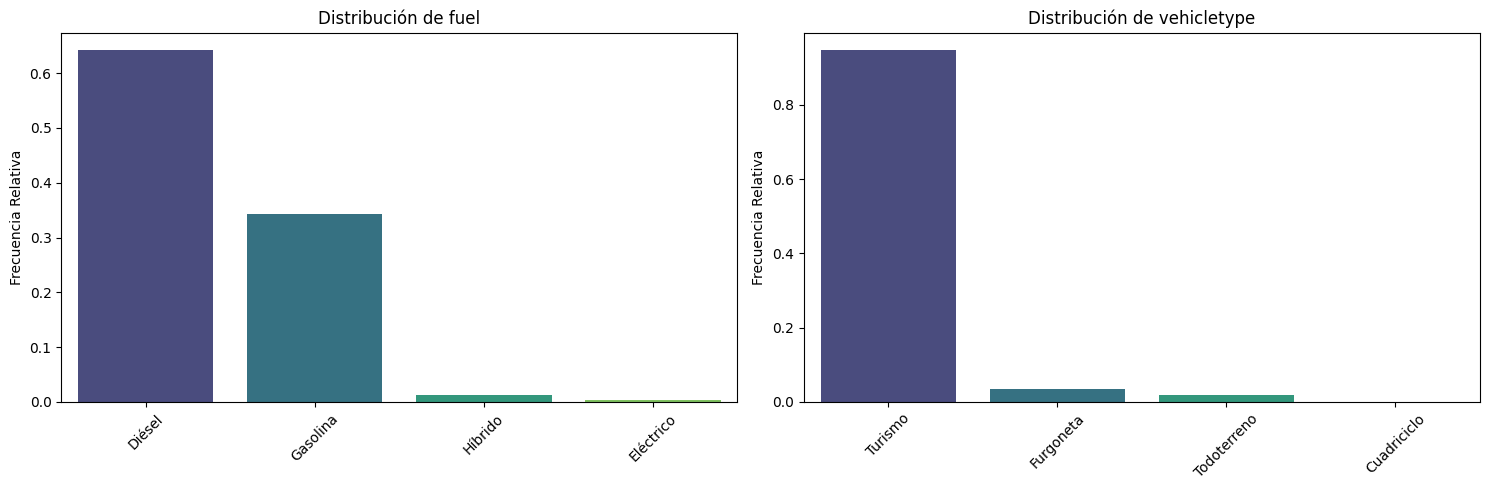

In [92]:
pinta_distribucion_categoricas(df_vehicles_cleaned, categoricas_v, relativa=True)

In [93]:
# Percentil
print(df_vehicles_cleaned.vehicleAge.quantile(0.5),
    df_vehicles_cleaned.vehicleAge.quantile(0.9), 
    df_vehicles_cleaned.vehicleAge.quantile(0.95),
    df_vehicles_cleaned.vehicleAge.max())

15.0 21.0 23.0 35


In [94]:
df_vehicles_cleaned.vehicleAge.describe()

count    78493.000000
mean        13.334718
std          6.464332
min          0.000000
25%          8.000000
50%         15.000000
75%         18.000000
max         35.000000
Name: vehicleAge, dtype: float64

In [95]:
# Cuartil
def get_IQR(df_vehicles_cleaned, col):
    return df_vehicles_cleaned[col].quantile(0.75) - df_vehicles_cleaned[col].quantile(0.25)

In [96]:
get_IQR(df_vehicles_cleaned,"vehicleAge")

np.float64(10.0)

In [97]:
df_vehicles_cleaned.describe().loc["50%"] # IQR(Rango intercuartílico)<Mediana , variable dispersa

policyId      20090.0
vehicleId     60383.0
vehicleAge       15.0
Name: 50%, dtype: float64

In [98]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [99]:
# BoxPlots
columnas_numericas_vehicles = df_vehicles_cleaned.describe().T.index.to_list()
print(columnas_numericas_vehicles)

['policyId', 'vehicleId', 'vehicleAge']


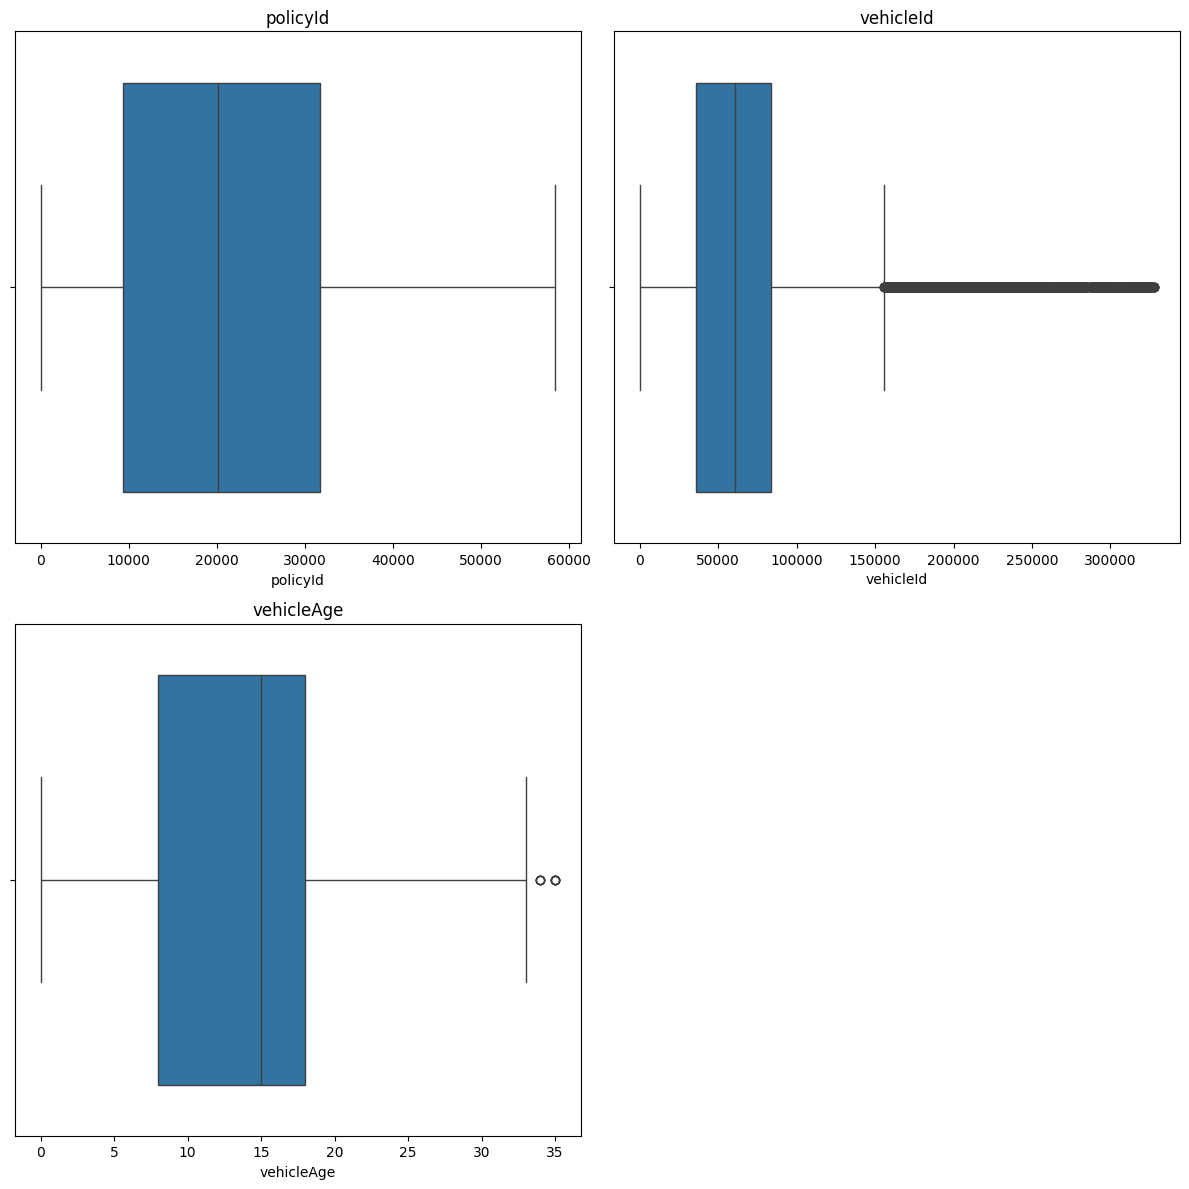

In [100]:
plot_multiple_boxplots(df_vehicles_cleaned, columnas_numericas_vehicles)

In [101]:
# vehiculeAge, cierta dispersión, pocos valores dispares

In [102]:
# Coeficiente de variación (CV)
def variabilidad(df):
    df_var=df_vehicles_cleaned.describe().loc[["std","mean"]].T
    df_var["CV"]=df_var["std"]/df_var["mean"]
    return df_var

In [103]:
variabilidad(df_vehicles_cleaned) # Variabilidad baja, vehicleAge

,std,mean,CV
policyId,13340.766005,20994.363982,0.635445
vehicleId,44716.295148,64272.948110,0.695725
vehicleAge,6.464332,13.334718,0.484775


<Axes: >

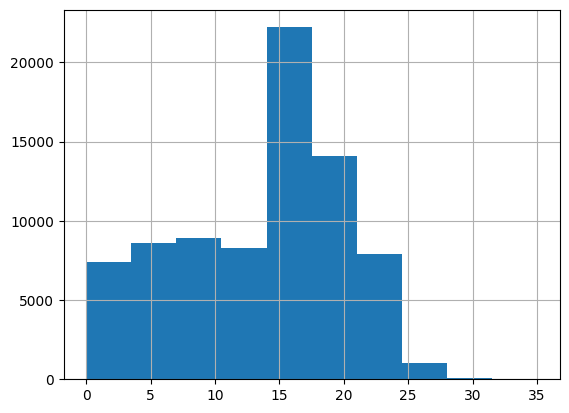

In [104]:
df_vehicles_cleaned["vehicleAge"].hist()

In [105]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

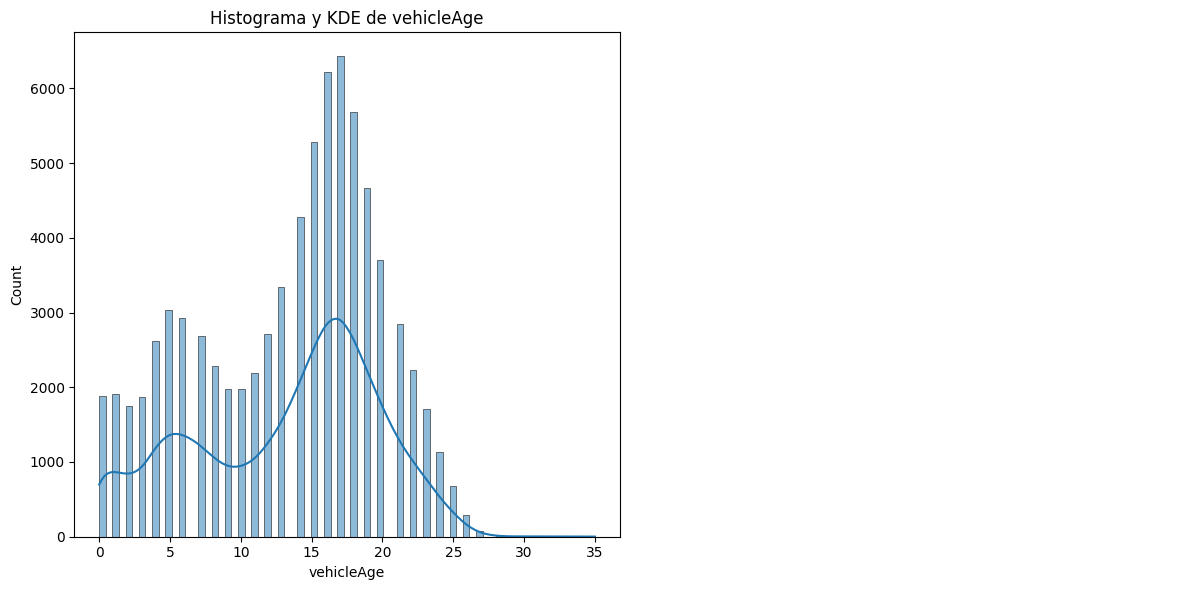

In [106]:
plot_histo_den(df_vehicles_cleaned,["vehicleAge"])

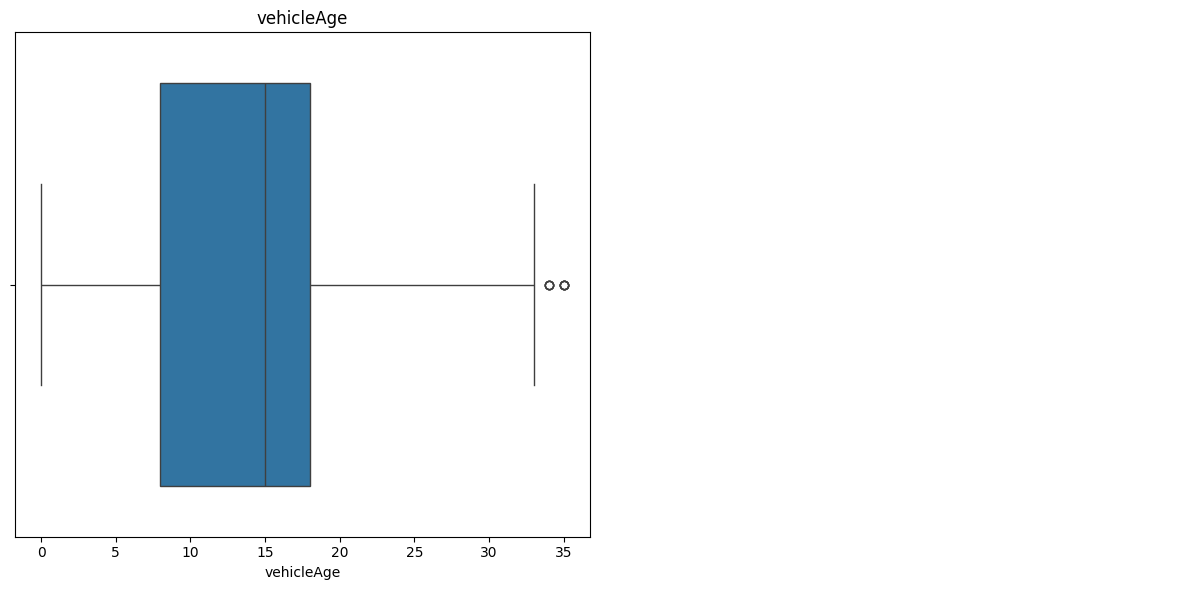

In [107]:
plot_multiple_boxplots(df_vehicles_cleaned,["vehicleAge"])